# Import Library

In [90]:
import numpy as np
import pandas as pd
import petroeval as pet
import matplotlib.pyplot as plt

# Collect Data

In [91]:
train_data = pd.read_csv("Well A.csv")
train_data.head()

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,734.419199,12.787381,NaN,1.407795,1.472684,NaN,118.992989,NaN,NaN,154.404816,NaN,9.875,26.911829,NaN,1
1,734.571200,12.790987,NaN,1.394810,1.464091,NaN,124.514305,NaN,NaN,154.974701,NaN,9.875,26.133530,NaN,1
2,734.723199,12.801331,NaN,1.377496,1.434632,NaN,126.779854,NaN,NaN,155.762970,NaN,9.875,27.482636,NaN,1
3,734.875200,12.628396,NaN,1.369218,1.419665,NaN,127.186066,NaN,NaN,156.187897,NaN,9.875,28.694523,NaN,1
4,735.027200,12.528492,NaN,1.373198,1.427742,NaN,125.184708,NaN,NaN,157.038986,NaN,9.875,28.981676,NaN,1


In [92]:
test_data = pd.read_csv("Well B.csv")
test_data.head()

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,684.270396,13.042573,NaN,1.414800,1.419300,NaN,88.937462,0.455408,NaN,159.805603,NaN,9.875,39.320923,NaN,1
1,684.422396,13.333869,NaN,1.392074,1.398481,NaN,87.800705,0.450693,NaN,158.900360,NaN,9.875,33.086723,NaN,1
2,684.574396,13.426064,NaN,1.435466,1.449827,NaN,86.460014,0.450432,NaN,156.982590,NaN,9.875,28.410923,NaN,1
3,684.726396,13.320748,NaN,1.458956,1.479819,NaN,85.662811,0.461263,NaN,155.278259,NaN,9.875,19.690228,NaN,1
4,684.878396,13.156784,NaN,1.394103,1.403053,NaN,86.043411,0.464723,NaN,155.096039,NaN,9.875,15.122011,NaN,1


In [93]:
train_data.shape, test_data.shape

((10708, 15), (10025, 15))

In [94]:
#Cek apakah adat kolom yang tidak ada pada dataset tes
number = 0
logs = []
for log in train_data.columns:
    if log not in test_data.columns:
        logs.append(log)
        number += 1
print(f"{number} logs not in test data")
print(logs)

0 logs not in test data
[]


In [95]:
train_data.columns

Index(['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'FACIES'],
      dtype='object')

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10708 entries, 0 to 10707
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  10708 non-null  float64
 1   CALI      10708 non-null  float64
 2   RSHA      0 non-null      float64
 3   RMED      10675 non-null  float64
 4   RDEP      10699 non-null  float64
 5   RHOB      10396 non-null  float64
 6   GR        10708 non-null  float64
 7   NPHI      10565 non-null  float64
 8   PEF       10396 non-null  float64
 9   DTC       10643 non-null  float64
 10  SP        0 non-null      float64
 11  BS        10708 non-null  float64
 12  ROP       10708 non-null  float64
 13  DRHO      10472 non-null  float64
 14  FACIES    10708 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [97]:
train_data.dtypes

DEPTH_MD    float64
CALI        float64
RSHA        float64
RMED        float64
RDEP        float64
RHOB        float64
GR          float64
NPHI        float64
PEF         float64
DTC         float64
SP          float64
BS          float64
ROP         float64
DRHO        float64
FACIES        int64
dtype: object

In [98]:
labels = dict(train_data.FACIES.value_counts())

In [99]:
lithofacies_names = ["1", "2", "3", "4", "5","6"]

In [100]:
train_data.FACIES.value_counts()

1    5237
2    1808
4    1796
6    1148
3     572
5     147
Name: FACIES, dtype: int64

<BarContainer object of 6 artists>

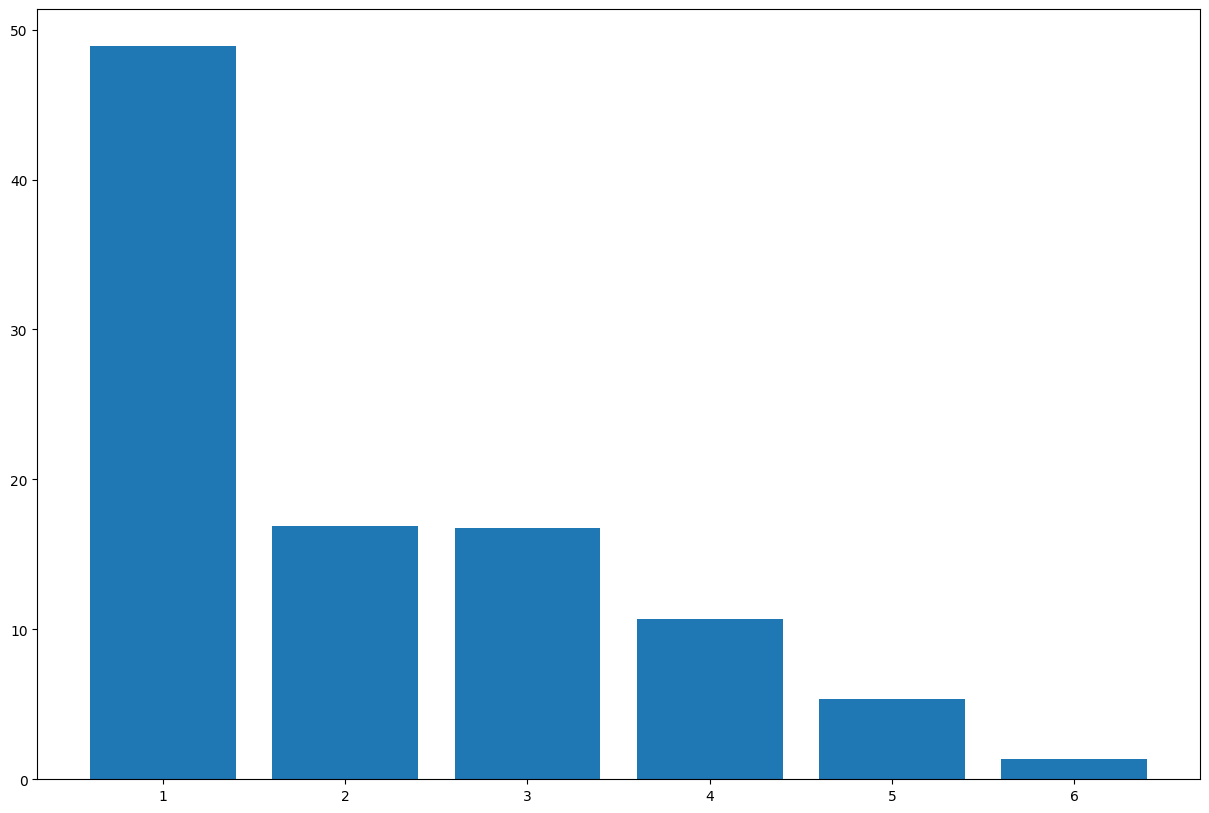

In [101]:
fig = plt.figure(figsize=(15,10))
plt.bar(lithofacies_names, (np.array(list(labels.values()))/train_data.shape[0])*100)

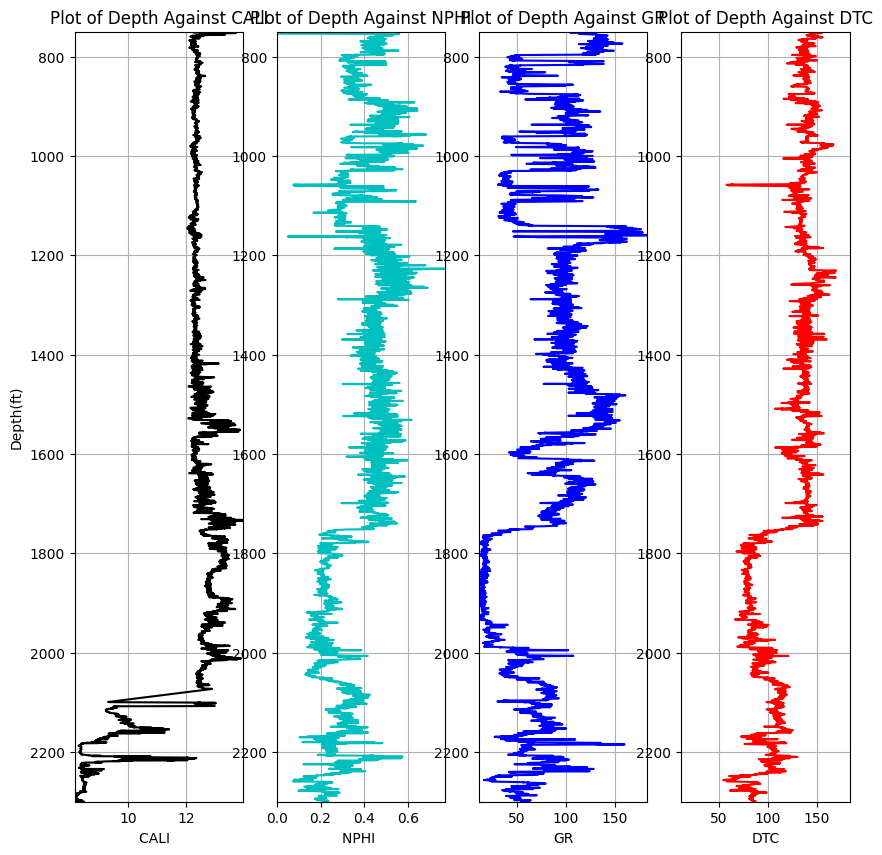

In [102]:
pet.four_plots(train_data, x1="CALI", x2="NPHI", x3="GR", x4="DTC",
               top=750, base=2300, depth="DEPTH_MD")

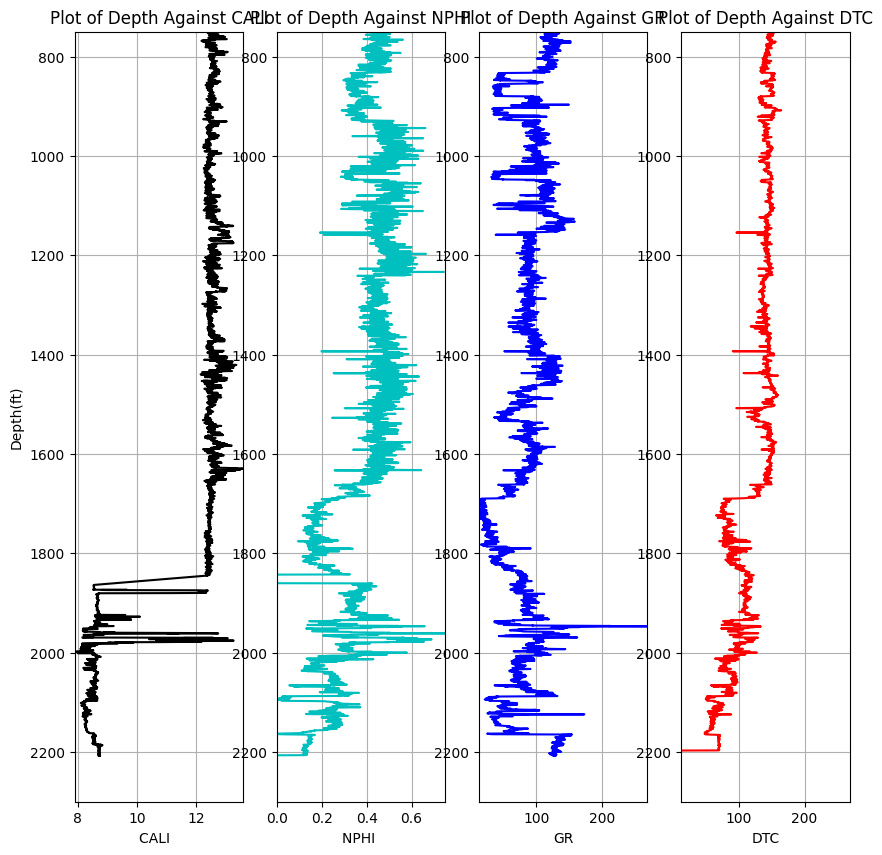

In [103]:
pet.four_plots(test_data, x1="CALI", x2="NPHI", x3="GR", x4="DTC",
               top=750, base=2300, depth="DEPTH_MD")

# Data cleaning and preparation

<Axes: >

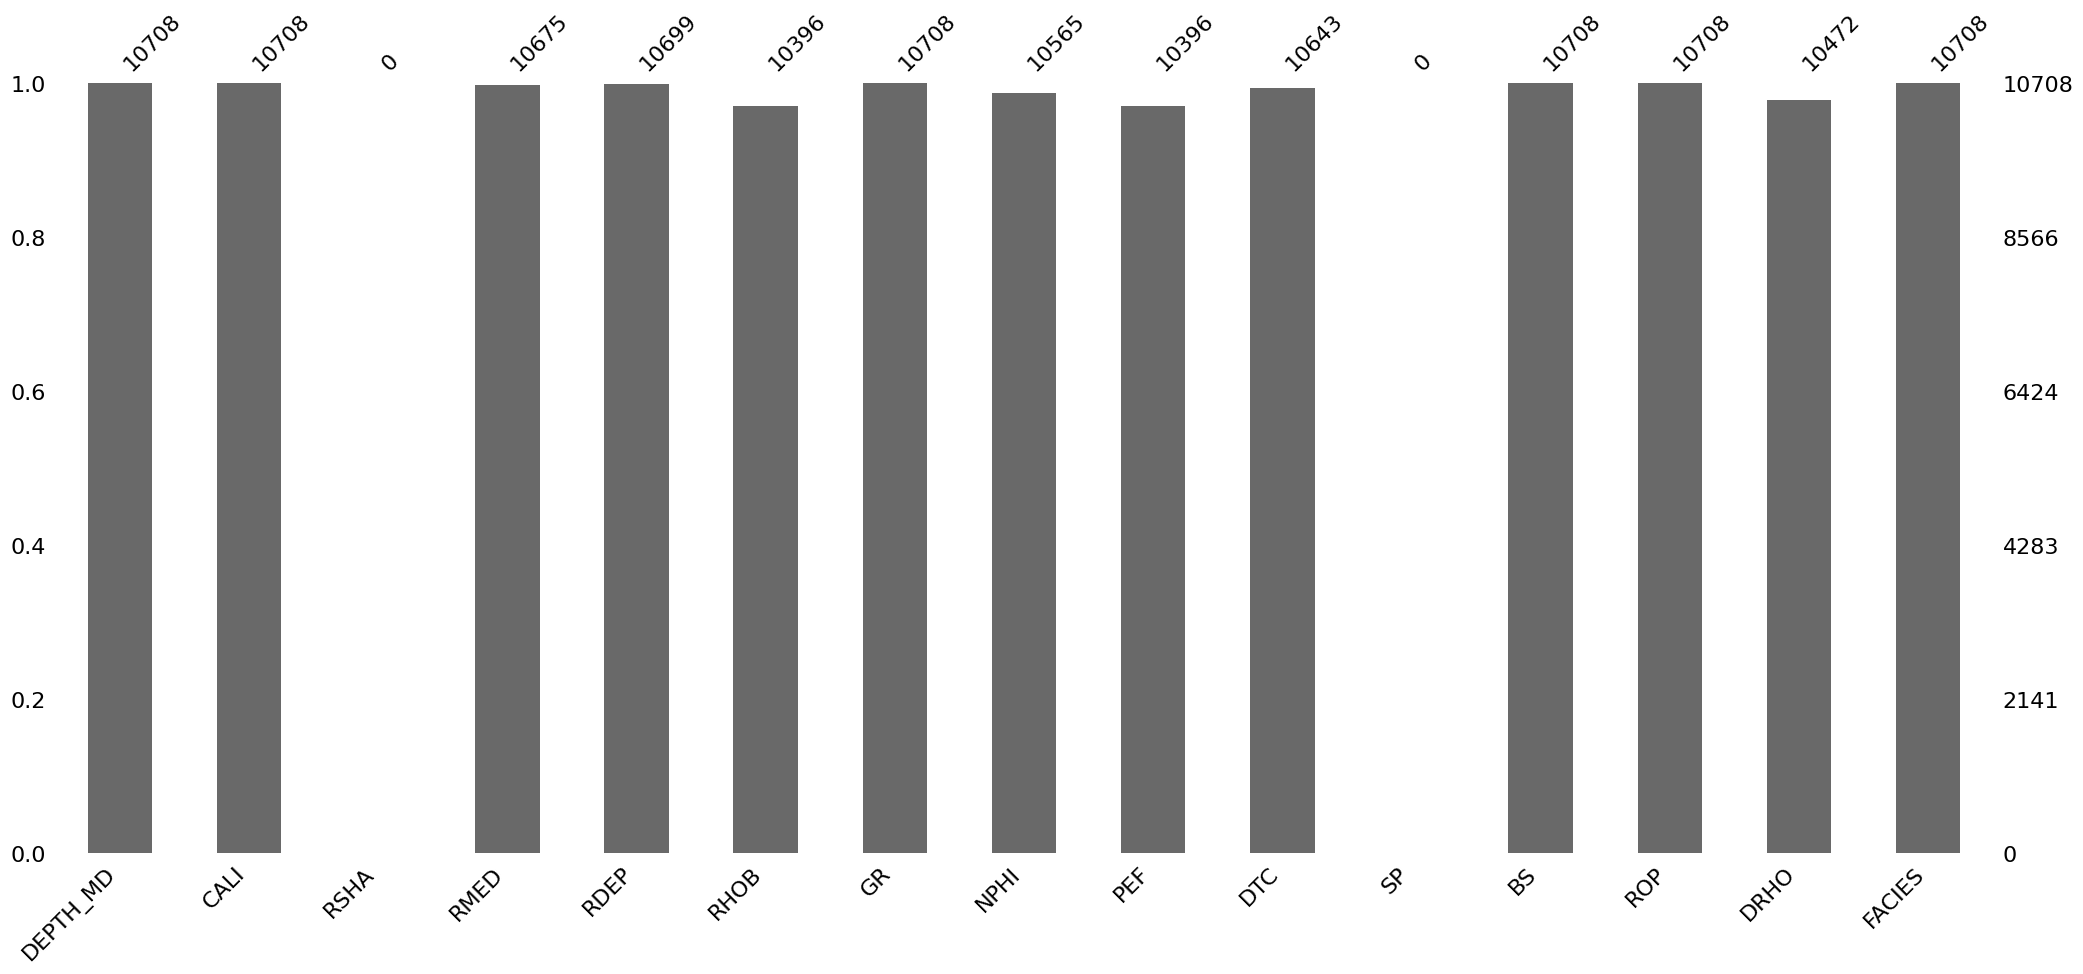

In [104]:
import missingno as msno
msno.bar(train_data)

In [105]:
train_data = train_data.drop(["ROP","BS",'RSHA',"SP"],axis=1)

In [106]:
train_data.dropna(inplace=True)
train_data

,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,DRHO,FACIES
130,754.179199,12.521476,1.412026,1.315972,2.079341,115.562035,0.495291,5.906584,143.338440,0.032364,1
131,754.331200,12.630612,1.398117,1.315344,2.077192,113.619270,0.501820,6.384551,143.411118,0.039953,1
132,754.483199,12.726549,1.394453,1.323453,2.076251,116.701439,0.522005,7.069182,143.314133,0.054563,1
133,754.635199,12.860774,1.415387,1.336856,2.078405,118.532913,0.546147,7.836967,143.667496,0.072767,1
134,754.787200,12.904781,1.389204,1.309308,2.079669,119.113991,0.558983,7.969746,145.145447,0.074599,1
...,...,...,...,...,...,...,...,...,...,...,...
10638,2351.395200,8.495781,2.419575,2.432598,2.446120,83.710793,0.206534,3.299096,81.848648,0.011542,3
10639,2351.547200,8.501786,2.298789,2.297934,2.444777,85.365189,0.198399,3.322829,91.259453,0.016520,3
10640,2351.699200,8.514043,2.244636,2.242675,2.433254,84.372864,0.206373,3.293875,94.804581,0.023240,3
10641,2351.851200,8.496308,2.178133,2.187869,2.415897,79.731628,0.199548,3.156241,93.250061,0.024025,2


<Axes: >

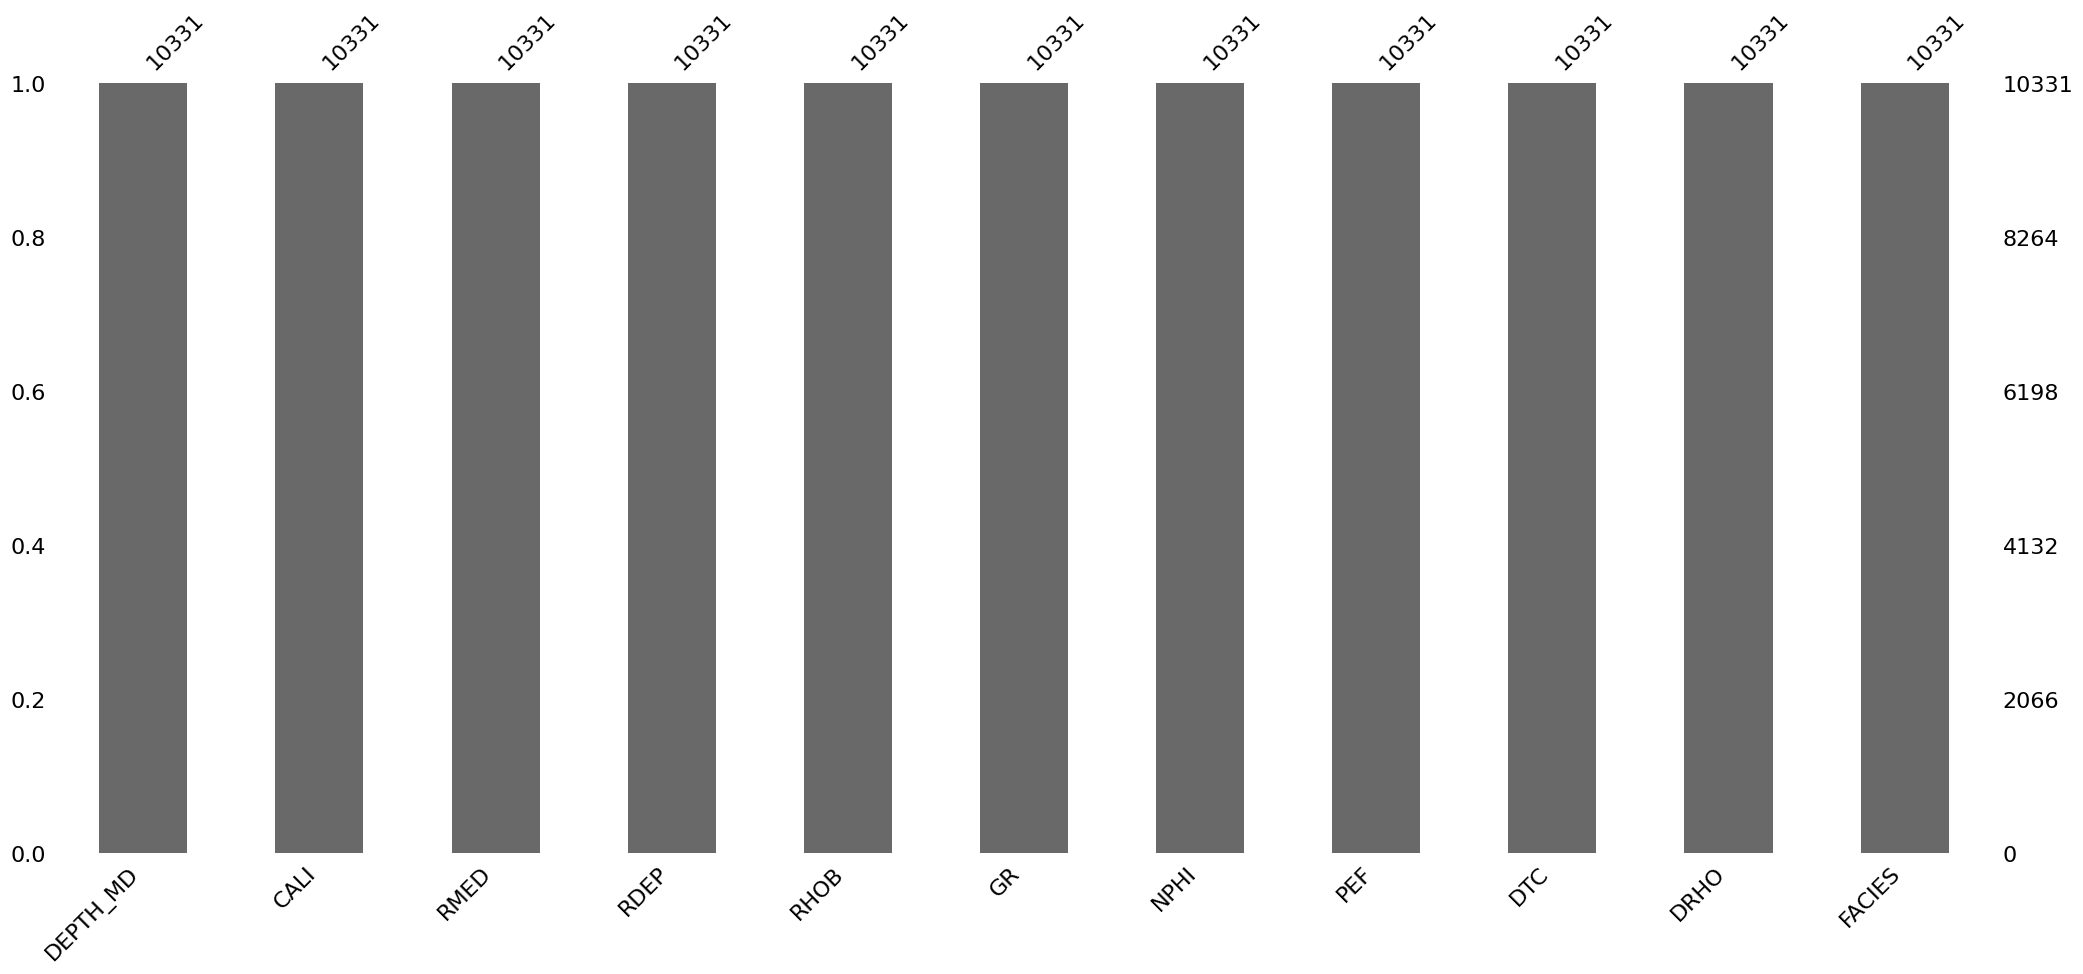

In [107]:
msno.bar(train_data)

# Random Forest Algorithm

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [111]:
#Pilih input dan target
X = train_data[["RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC"]]
y = train_data["FACIES"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Rf model

In [113]:
rf = RandomForestClassifier()

In [114]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [115]:
y_pred = rf.predict(X_test)

### evaluation model

In [116]:
#accuracy report
accuracy_score(y_test, y_pred)

0.9448387096774193

In [118]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98      1506
           2       0.92      0.96      0.94       551
           3       0.82      0.66      0.73       179
           4       0.97      0.93      0.95       559
           5       0.92      0.95      0.94        38
           6       0.88      0.93      0.90       267

    accuracy                           0.94      3100
   macro avg       0.91      0.90      0.91      3100
weighted avg       0.94      0.94      0.94      3100



In [119]:
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1479   10   12    1    1    3]
 [   8  527   14    2    0    0]
 [  28   30  119    0    1    1]
 [   6    3    0  521    0   29]
 [   2    0    0    0   36    0]
 [   4    0    1   14    1  247]]


In [120]:
import seaborn as sns

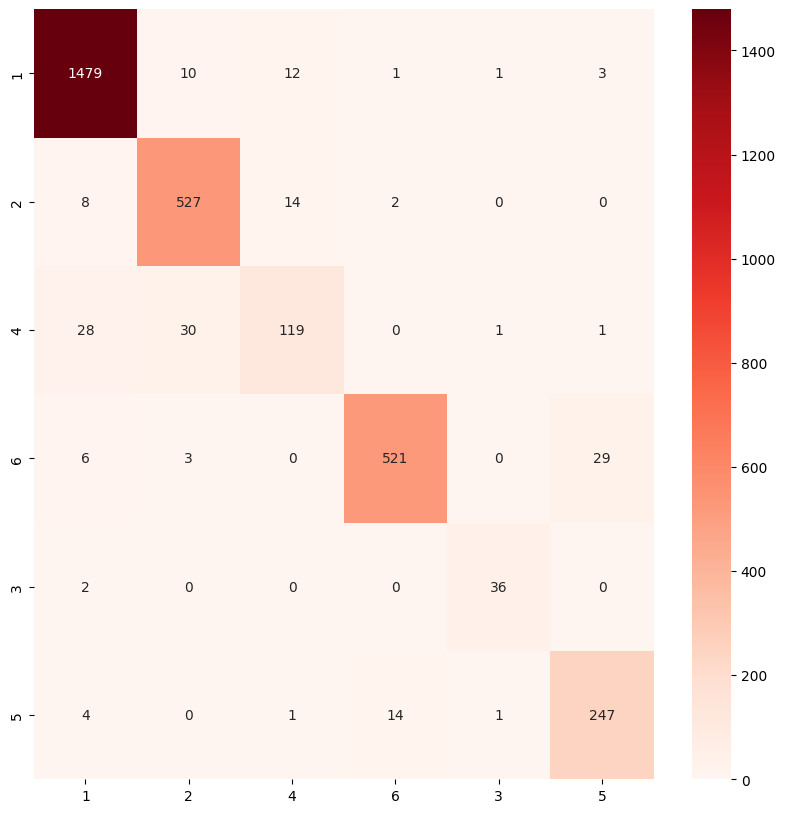

In [121]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap="Reds", fmt=".0f",
                 xticklabels=labels,
                 yticklabels=labels)

### Implementation model using blind dataset

In [123]:
test_data = pd.read_csv("Well B.csv")

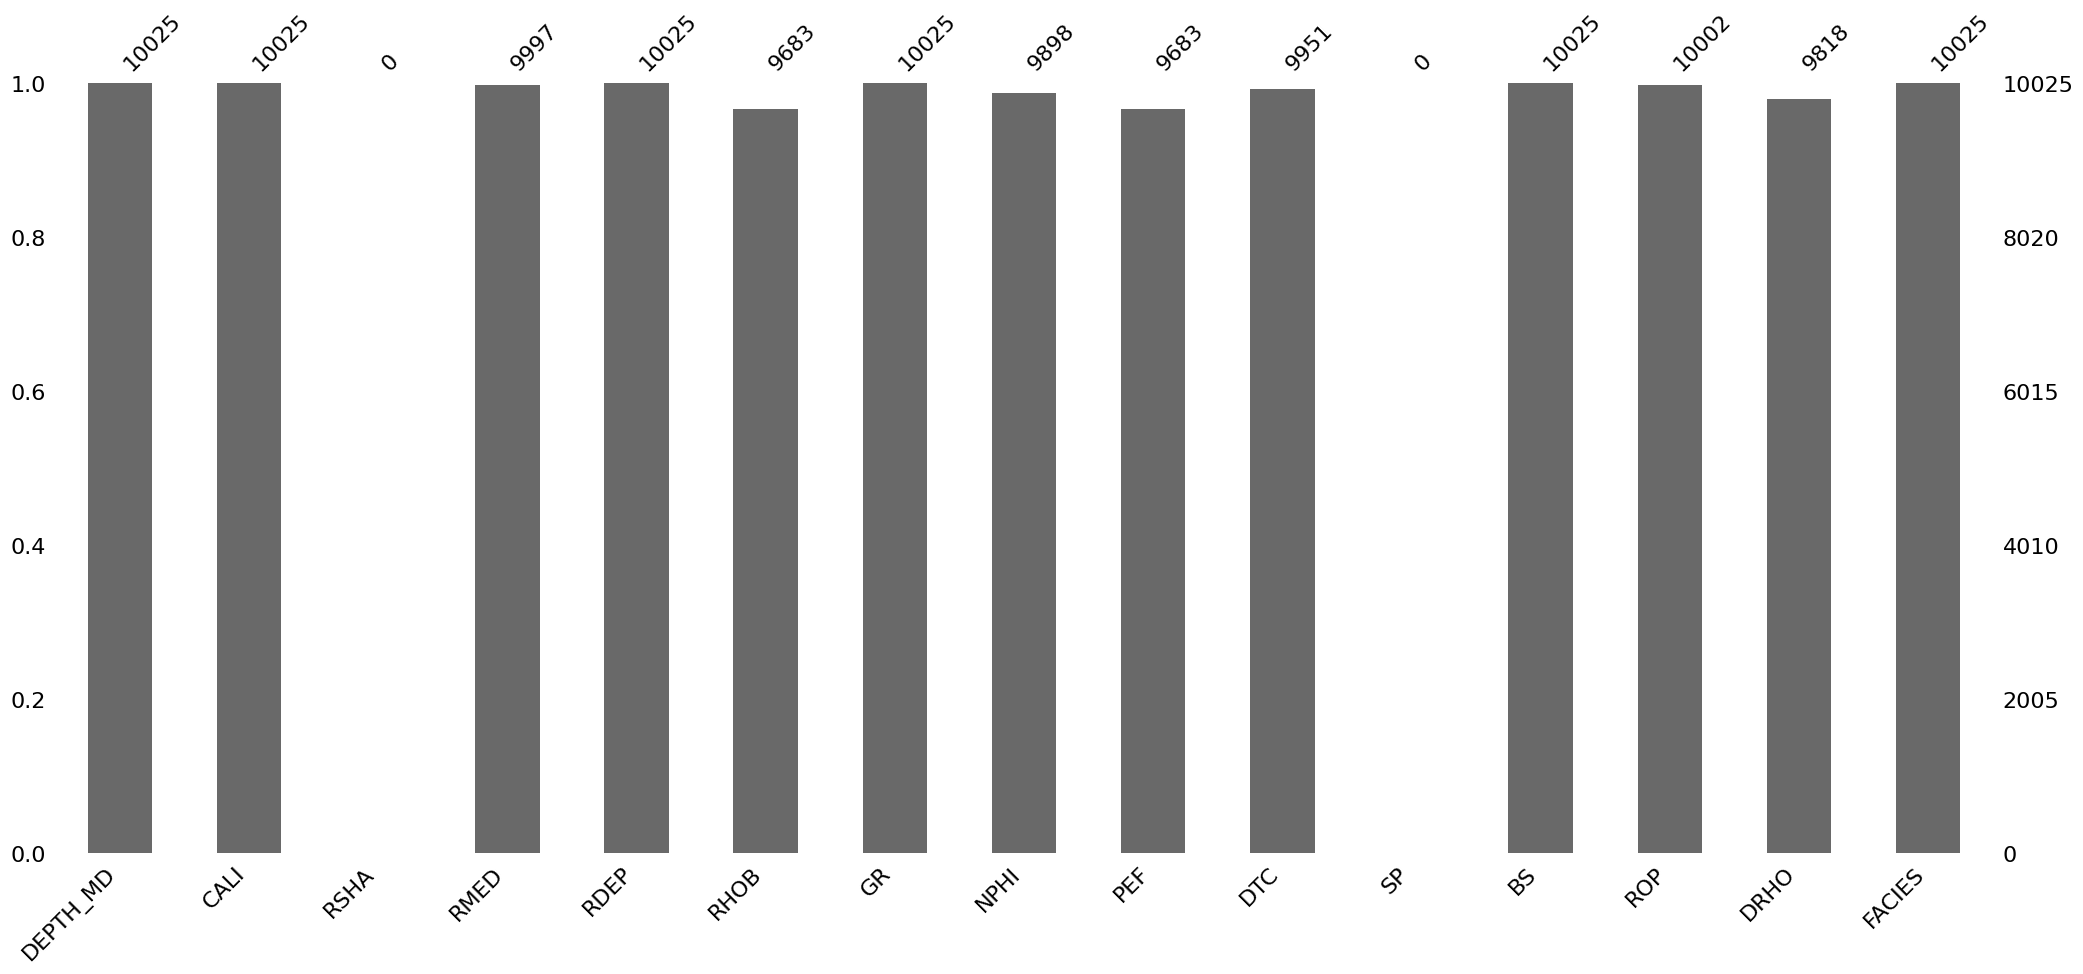

In [124]:
# Contoh pembersihan dan persiapan data pada dataset baru
msno.bar(test_data)
test_data = test_data.drop(["ROP","BS",'RSHA',"SP"], axis=1)
test_data.dropna(inplace=True)


In [127]:
# Pilih fitur pada dataset baru yang sesuai dengan fitur pada dataset pelatihan
X_test_new = test_data[["RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC"]]

# Lakukan prediksi menggunakan model
y_pred_new = rf.predict(X_test_new)

# Menyertakan label sebenarnya dari dataset baru
true_labels_new = test_data["FACIES"]


Accuracy on new dataset: 0.7714672780325136
              precision    recall  f1-score   support

           1       0.88      0.95      0.91      5670
           2       0.65      0.51      0.57      1237
           3       0.14      0.35      0.20       264
           4       0.83      0.57      0.67      1277
           5       0.60      0.32      0.42       168
           6       0.62      0.56      0.59       905
           7       0.00      0.00      0.00        75

    accuracy                           0.77      9596
   macro avg       0.53      0.47      0.48      9596
weighted avg       0.78      0.77      0.77      9596

[[5391    6  232    1   20   20    0]
 [ 278  633  250   12   10   54    0]
 [ 100   36   93    9    0   26    0]
 [  51  241   49  722    5  209    0]
 [  91   11    4    3   54    5    0]
 [ 248   51   46   49    1  510    0]
 [   1    1    0   73    0    0    0]]


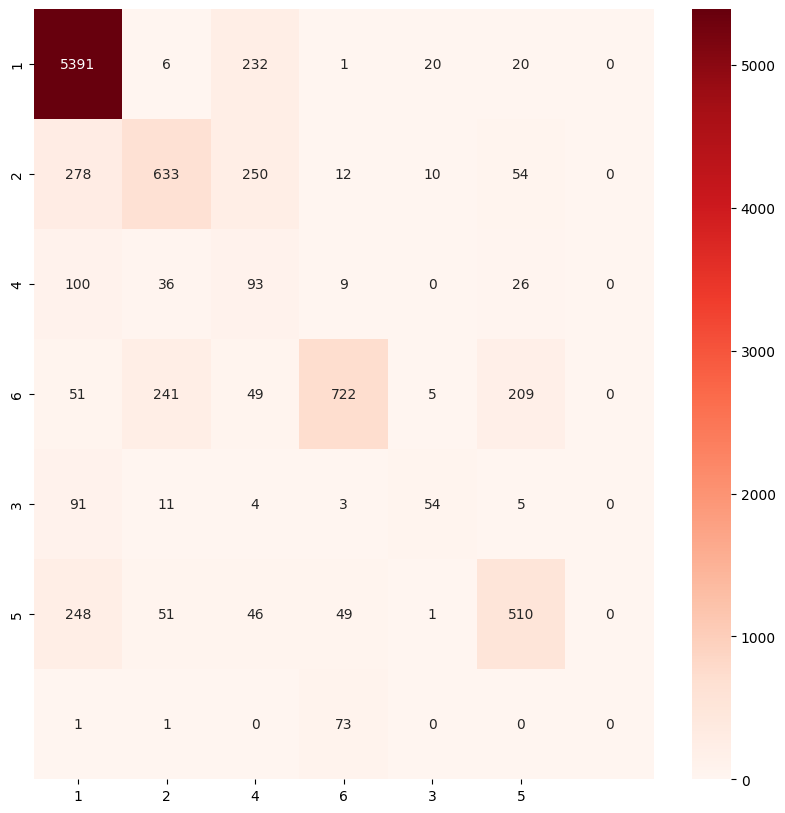

In [128]:
# Accuracy report pada dataset baru
accuracy_new = accuracy_score(true_labels_new, y_pred_new)
print(f"Accuracy on new dataset: {accuracy_new}")

# Classification report pada dataset baru
print(classification_report(true_labels_new, y_pred_new))

# Confusion matrix pada dataset baru
cf_matrix_new = confusion_matrix(true_labels_new, y_pred_new)
print(cf_matrix_new)

# Visualisasi confusion matrix pada dataset baru
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix_new, annot=True, cmap="Reds", fmt=".0f",
                 xticklabels=labels, yticklabels=labels)


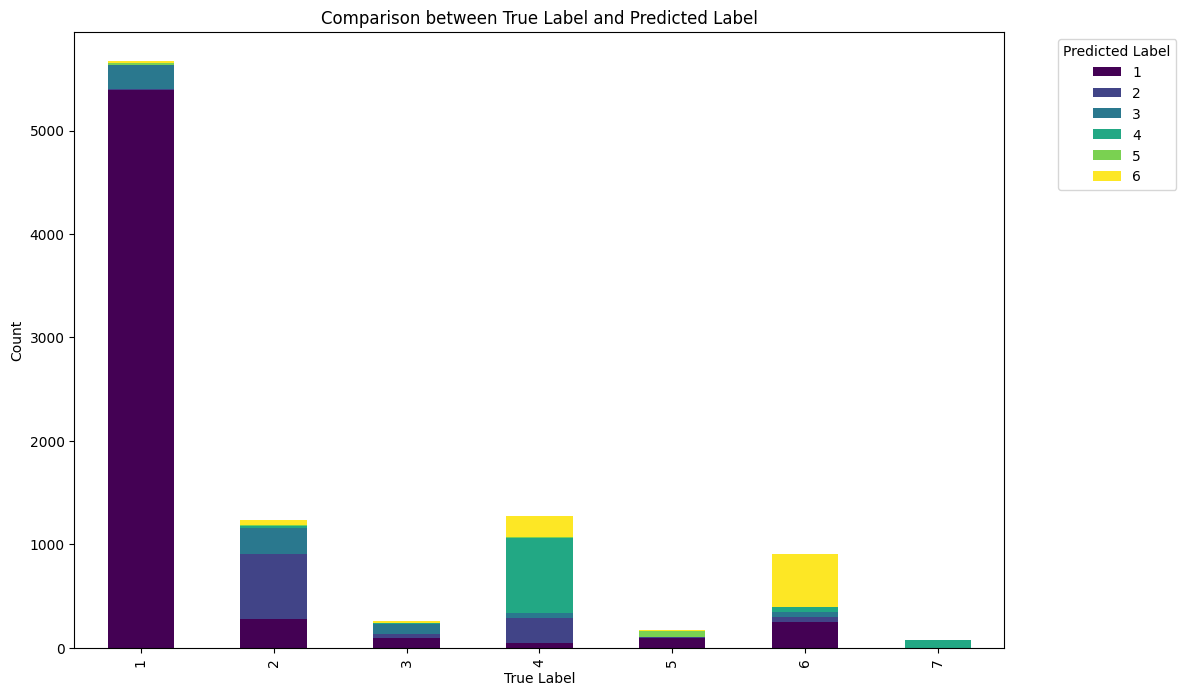

In [130]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame baru untuk membandingkan true label dan predicted label
comparison_df = pd.DataFrame({'True Label': true_labels_new, 'Predicted Label': y_pred_new})

# Menghitung frekuensi masing-masing label
label_counts = comparison_df.groupby(['True Label', 'Predicted Label']).size().unstack(fill_value=0)

# Plot bar untuk membandingkan true label dan predicted label
label_counts.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Comparison between True Label and Predicted Label')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.legend(title='Predicted Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



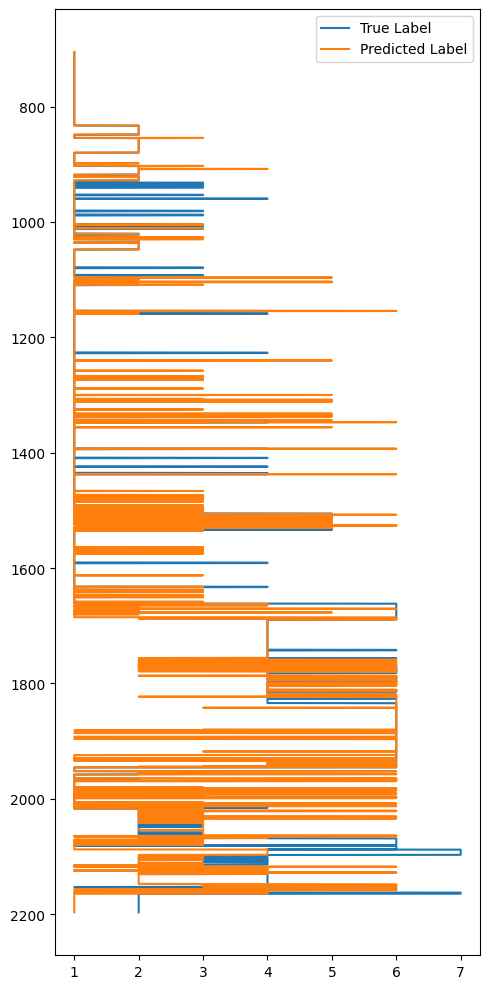

In [131]:
figure, ax = plt.subplots(figsize=(5,10))
logs = test_data.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_pred_new, logs.DEPTH_MD, label='Predicted Label')
ax.invert_yaxis()
# ax.set_xlabel(features[i])
plt.tight_layout()
plt.legend()